In [1]:
import numpy as np
from numpy.linalg import inv
import fsps
import pandas as pd
from vtl.Readfile import Readfile
import matplotlib
from spec_id import RT_spec,Gen_spec, Analyze_LH_lwa,Median_w_Error_cont,Leave_one_out
import matplotlib.pyplot as plt
from astropy.cosmology import Planck13, z_at_value
from astropy.table import Table
from astropy.io import fits
import astropy
from astropy import units as u
from astropy.cosmology import WMAP9 as cosmo
import os
import cPickle
import seaborn as sea
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({"xtick.direction": "in","ytick.direction": "in"})
colmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.1, as_cmap=True)

In [2]:
matplotlib.matplotlib_fname()

u'/Users/Vince.ec/.matplotlib/matplotlibrc'

In [3]:
galDB = pd.read_pickle('../data/sgal_param_DB.pkl')
lzDB = galDB.query('hi_res_specz < 1.16')
mzDB = galDB.query('1.16 < hi_res_specz < 1.3')
mzDB = mzDB.query('ids != 14713 and ids != 38126')
hzDB = galDB.query('1.3 < hi_res_specz < 1.45')
uhzDB = galDB.query('1.45 < hi_res_specz')
metal=np.arange(0.002,0.031,0.001)
age=np.arange(.5,6.1,.1)
tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
     9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]
M,A=np.meshgrid(metal,age)
ultau=np.append([0],10**(np.array(tau[1:])-9))

In [23]:
# pd.to_pickle(galDB,'../data/sgal_param_DB.pkl')

In [21]:
SN = []

for i in galDB.index:
    spec = Gen_spec(galDB['gids'][i], galDB['hi_res_specz'][i], maxwv=11400)
    fl = np.trapz(spec.gal_fl[spec.gal_fl > 5E-21],spec.gal_wv[spec.gal_fl > 5E-21])
    er = np.trapz(spec.gal_er[spec.gal_fl > 5E-21],spec.gal_wv[spec.gal_fl > 5E-21])
    SN.append(fl/er)

../data/galaxy_flts/n14713_flt: photutils.detect_sources (detect_thresh=0.0, grow_seg=5, gauss_fwhm=2.0, ZP=0.0)
../data/galaxy_flts/n14713_flt: photutils.source_properties
Rename column: ycentroid -> y_flt
Rename column: ra_icrs_centroid -> ra
Rename column: dec_icrs_centroid -> dec
Rename column: xcentroid -> x_flt
../data/galaxy_flts/n14713_flt: photutils.source_properties - 1 objects
../data/galaxy_flts/n14713_flt: save ../data/galaxy_flts/n14713_flt.detect_seg.fits, ../data/galaxy_flts/n14713_flt.detect.cat
../data/galaxy_flts/n16758_flt: photutils.detect_sources (detect_thresh=0.0, grow_seg=5, gauss_fwhm=2.0, ZP=0.0)
../data/galaxy_flts/n16758_flt: photutils.source_properties
Rename column: ycentroid -> y_flt
Rename column: ra_icrs_centroid -> ra
Rename column: dec_icrs_centroid -> dec
Rename column: xcentroid -> x_flt
../data/galaxy_flts/n16758_flt: photutils.source_properties - 1 objects
../data/galaxy_flts/n16758_flt: save ../data/galaxy_flts/n16758_flt.detect_seg.fits, ../dat

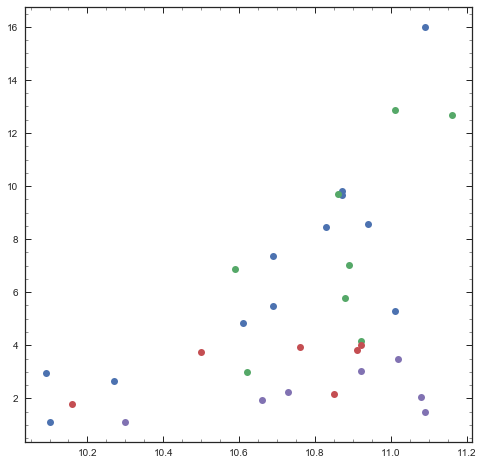

In [4]:
%matplotlib inline

plt.figure(figsize=[8,8])
plt.plot(lzDB['lmass'],lzDB['SN'],'o')
plt.plot(mzDB['lmass'],mzDB['SN'],'o')
plt.plot(hzDB['lmass'],hzDB['SN'],'o')
plt.plot(uhzDB['lmass'],uhzDB['SN'],'o')

In [22]:
galDB['SN']=SN

In [24]:
np.array([galDB['gids'],galDB['SN']]).T

array([['n14713', 2.3901019822195608],
       ['n16758', 8.4476961103855306],
       ['n17070', 4.1785822375381878],
       ['n19442', 1.1109152630598553],
       ['n21156', 12.686546939404833],
       ['n21427', 2.2380752971780398],
       ['n23435', 2.6425564585173196],
       ['n32566', 4.824775087042914],
       ['n34694', 8.5576752329888421],
       ['n37686', 7.0111791808154269],
       ['n38126', 3.3435725494475395],
       ['s35774', 9.7190723469849161],
       ['s38785', 5.7992204148797377],
       ['s39012', 1.4813442049408856],
       ['s39170', 16.006232025906748],
       ['s39241', 9.6449279929342584],
       ['s39631', 7.3672137416075696],
       ['s39804', 3.8085340330900768],
       ['s39805', 2.995831976487318],
       ['s40223', 1.9551556844437576],
       ['s40476', 6.8829823263840977],
       ['s40597', 12.850875182957054],
       ['s40623', 3.946808922207159],
       ['s40862', 4.0258569366964778],
       ['s41148', 2.0491163848935185],
       ['s41520', 3.04775076

In [18]:
spec = Gen_spec(galDB['gids'][50], galDB['hi_res_specz'][50], maxwv=11400)

../data/galaxy_flts/n17070_flt: photutils.detect_sources (detect_thresh=0.0, grow_seg=5, gauss_fwhm=2.0, ZP=0.0)
../data/galaxy_flts/n17070_flt: photutils.source_properties
Rename column: ycentroid -> y_flt
Rename column: ra_icrs_centroid -> ra
Rename column: dec_icrs_centroid -> dec
Rename column: xcentroid -> x_flt
../data/galaxy_flts/n17070_flt: photutils.source_properties - 1 objects
../data/galaxy_flts/n17070_flt: save ../data/galaxy_flts/n17070_flt.detect_seg.fits, ../data/galaxy_flts/n17070_flt.detect.cat


In [19]:
spec.gal_fl

array([  3.23212338e-18,   1.50205957e-18,   1.07176634e-18,
         5.58658842e-19,   8.98294058e-19,   1.31748688e-18,
         1.79117739e-18,   1.06969282e-18,   5.88507096e-19,
         1.94724177e-18,   1.22491948e-18,   7.39880697e-20,
         3.12116017e-18,   1.80596729e-18,   1.13899580e-18,
         5.28462495e-19,   6.09780409e-19,   1.24065182e-18,
         2.38921562e-18,   1.55287060e-18,   9.99044437e-19,
         5.63015784e-19,   2.08864057e-19,   3.82109976e-19,
         1.00715623e-18,   8.86163637e-19,   9.58409283e-19,
         5.64263175e-19,   1.82911518e-18,   1.72539736e-18,
         1.49094194e-19,   7.75573239e-19,   7.73969719e-19,
         1.17310973e-18,   1.56887124e-19,   9.74436319e-19,
         2.26793550e-18,   8.23164333e-19,   1.12583914e-18,
         1.41242379e-18,   1.16404802e-18,   7.45425755e-19,
         1.00693159e-18,   1.30916765e-18,   1.04904029e-18,
         7.52352748e-19,   9.68530481e-19,   9.31195272e-19,
         5.70388281e-19,